## 1. Load Libraries and Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('yield.csv')
df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [4]:
# Basic Information & Overview
print("Shape of the dataset:", df.shape)
print("\n Data Info:\n")
df.info()
print(df.describe())

Shape of the dataset: (56717, 12)

 Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB
          Area Code  Element Code     Item Code     Year Code          Year  \
count  56717.000000       56717.0  56717.000000  56717.000000  56717.000000   
mean     125.650422        5419.0    111.611651

## 2. Cleaning

### 1. Missing Values

In [9]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='missing_percent', ascending=False)
print(missing)

              missing_count  missing_percent
Domain Code               0              0.0
Domain                    0              0.0
Area Code                 0              0.0
Area                      0              0.0
Element Code              0              0.0
Element                   0              0.0
Item Code                 0              0.0
Item                      0              0.0
Year Code                 0              0.0
Year                      0              0.0
Unit                      0              0.0
Value                     0              0.0


### 2. Handling Missing Values

In [10]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

print("Missing Values after Cleaning:\n", df.isnull().sum())

Missing Values after Cleaning:
 Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64


C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_14388\2140688533.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


### 3. Duplicates & Datatypes

In [11]:
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate rows after cleaning:", df.duplicated().sum())

Duplicate rows: 0
Duplicate rows after cleaning: 0


## 3. Univariate, Bivariate & Multivariate Analysis

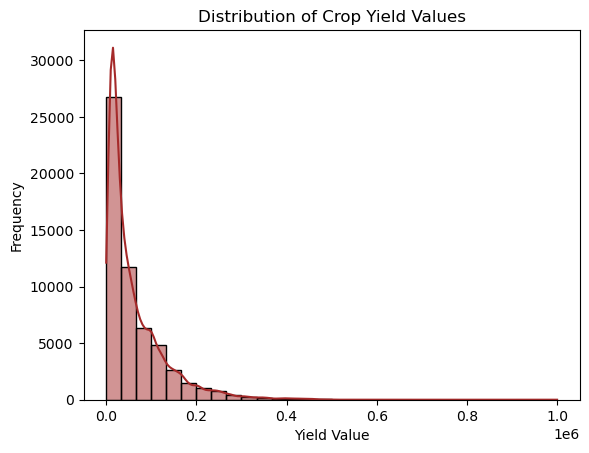

In [12]:
# Histogram for Yield Values
sns.histplot(df['Value'], bins=30, kde=True, color='brown')
plt.title('Distribution of Crop Yield Values')
plt.xlabel('Yield Value')
plt.ylabel('Frequency')
plt.show()

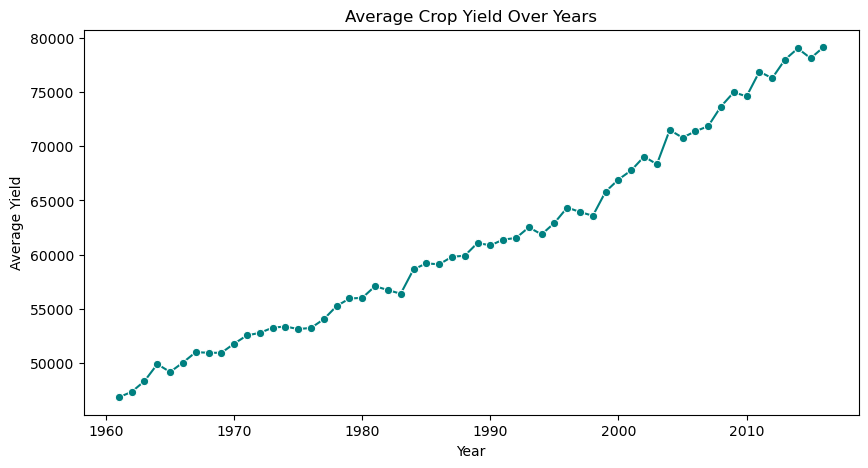

In [13]:
plt.figure(figsize=(10, 5))
yearly_yield = df.groupby('Year')['Value'].mean().reset_index()
sns.lineplot(data=yearly_yield, x='Year', y='Value', marker='o', color='teal')
plt.title('Average Crop Yield Over Years')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.show()

C:\Users\POOJASRIMENDU\AppData\Local\Temp\ipykernel_14388\4077979979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')


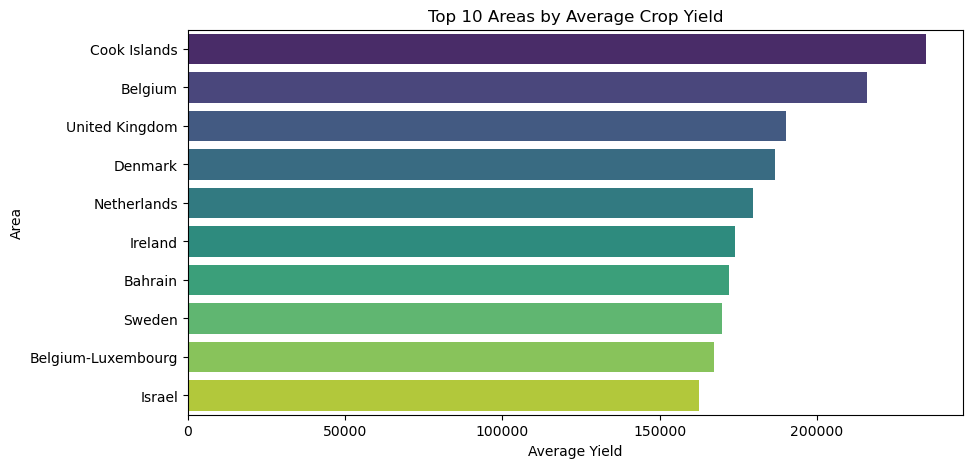

In [14]:
plt.figure(figsize=(10, 5))
top_areas = df.groupby('Area')['Value'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')
plt.title('Top 10 Areas by Average Crop Yield')
plt.xlabel('Average Yield')
plt.ylabel('Area')
plt.show()

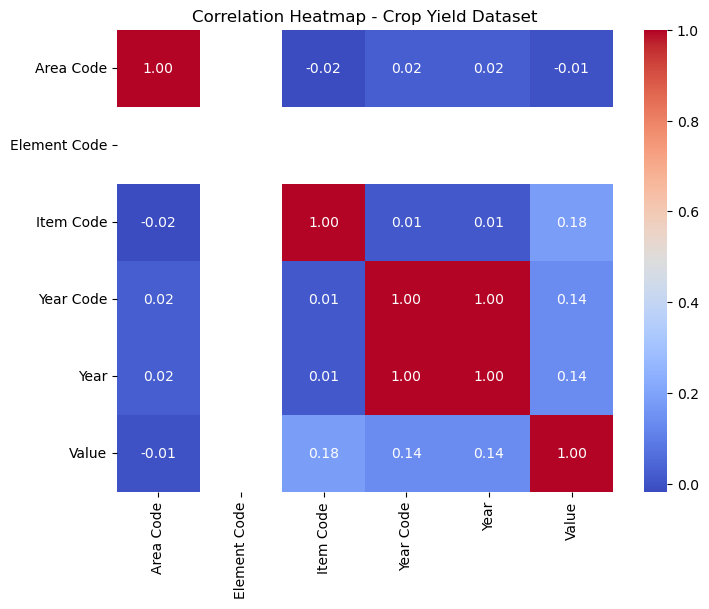

In [17]:
# Correlation Heatmap for Numeric Columns
df.columns = df.columns.str.strip()
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Crop Yield Dataset')
plt.show()

## 4. Outlier Detection on Yield

In [18]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Value'] < lower) | (df['Value'] > upper)]
print("\nNumber of Outliers in Yield:", len(outliers))


Number of Outliers in Yield: 3169


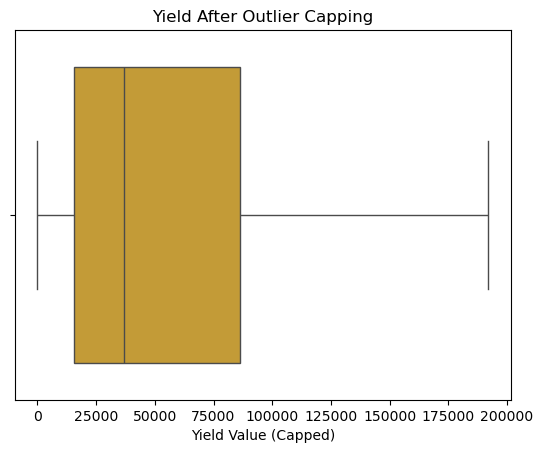

In [19]:
df['Value_capped'] = df['Value'].clip(lower, upper)
# Boxplot after capping
sns.boxplot(x=df['Value_capped'], color='goldenrod')
plt.title('Yield After Outlier Capping')
plt.xlabel('Yield Value (Capped)')
plt.show()

## 5. Feature Engineering
#### Example: Categorize Items or Create Dummy Columns

In [20]:
df['Is_Cereal'] = df['Item'].apply(lambda x: 1 if 'Cereal' in x else 0)

## 6. Key Insights
- The dataset contains information about crop yields across different **areas**, **items (crops)**, and **years**.  
- There are **no missing values** or duplicates after cleaning, indicating a well-structured dataset.  
- The **distribution of yield values (Value column)** shows a few high-value outliers, which were treated using IQR capping.  
- **Average crop yield** tends to vary significantly between areas and years, showing possible regional and temporal influences.  
- The **correlation heatmap** shows a strong positive correlation between `Year` and `Value`, indicating a gradual increase in yields over time.  
- Codes like `Area Code` and `Item Code` are categorical identifiers — they don’t carry numeric meaning but help in grouping and analysis.  
- Feature engineering (like adding a `Decade` column) helps to identify **long-term yield trends**.  
- After cleaning and outlier handling, the dataset is now **ready for visualization or predictive modeling** (e.g., regression or forecasting).

## Export cleaned dataset

In [21]:
df.to_csv('Crop_Yield_cleaned.csv', index=False)
print("\n✅ Cleaned Crop Yield data saved as 'Crop_Yield_cleaned.csv'")


✅ Cleaned Crop Yield data saved as 'Crop_Yield_cleaned.csv'
